In [40]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import pandas as pd


In [2]:
data = load_breast_cancer()

X = data.data
y = data.target

In [3]:
df = pd.DataFrame(data.data, columns = data.feature_names)
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=16)


print(X_train[0])

[1.708e+01 2.715e+01 1.112e+02 9.309e+02 9.898e-02 1.110e-01 1.007e-01
 6.431e-02 1.793e-01 6.281e-02 9.291e-01 1.152e+00 6.051e+00 1.152e+02
 8.740e-03 2.219e-02 2.721e-02 1.458e-02 2.045e-02 4.417e-03 2.296e+01
 3.449e+01 1.521e+02 1.648e+03 1.600e-01 2.444e-01 2.639e-01 1.555e-01
 3.010e-01 9.060e-02]


In [14]:
knn_model = KNeighborsClassifier()

knn_model.fit(X_train,y_train)

knn_pred = knn_model.predict(X_test)

# ->  (True Positives + True Negatives) / (True Positives + False Positives + Ture Negatives + False Negatives)
accuracy = accuracy_score(y_test, knn_pred)
# True Positives / (True Positives + False Positives) 
precision = precision_score(y_test, knn_pred)
# True Positives / (True Positives + False Negatives)
recall = recall_score(y_test, knn_pred)

confusion = confusion_matrix(y_test,knn_pred)

# What is accuracy? -> Percent of accurate predictions
print(accuracy)
print(precision)
print(recall)

print(confusion)

0.916083916083916
0.9157894736842105
0.9560439560439561
[[44  8]
 [ 4 87]]


In [38]:
log_model = LogisticRegression(max_iter=2000)

log_model.fit(X_train,y_train)

log_pred = log_model.predict(X_test)

# ->  (True Positives + True Negatives) / (True Positives + False Positives + Ture Negatives + False Negatives)
accuracy = accuracy_score(y_test,log_pred)
# True Positives / (True Positives + False Positives) 
precision = precision_score(y_test, log_pred)
# True Positives / (True Positives + False Negatives)
recall = recall_score(y_test, log_pred)

confusion = confusion_matrix(y_test,log_pred)

# What is accuracy? -> Percent of accurate predictions
print(accuracy)
print(precision)
print(recall)

print(confusion)


0.9440559440559441
0.946236559139785
0.967032967032967
[[47  5]
 [ 3 88]]


In [24]:
svm_model =   SVC(kernel="linear", C=0.025, random_state=42)

svm_model.fit(X_train,y_train)

svm_pred = svm_model.predict(X_test)

# ->  (True Positives + True Negatives) / (True Positives + False Positives + Ture Negatives + False Negatives)
accuracy = accuracy_score(y_test,svm_pred )
# True Positives / (True Positives + False Positives) 
precision = precision_score(y_test, svm_pred )
# True Positives / (True Positives + False Negatives)
recall = recall_score(y_test,svm_pred )

confusion = confusion_matrix(y_test,svm_pred )

# What is accuracy? -> Percent of accurate predictions
print(accuracy)
print(precision)
print(recall)

print(confusion)


0.9300699300699301
0.9354838709677419
0.9560439560439561
[[46  6]
 [ 4 87]]


In [42]:
tree_model =   DecisionTreeClassifier()

tree_model.fit(X_train,y_train)

tree_pred = tree_model.predict(X_test)

# ->  (True Positives + True Negatives) / (True Positives + False Positives + Ture Negatives + False Negatives)
accuracy = accuracy_score(y_test,tree_pred  )
# True Positives / (True Positives + False Positives) 
precision = precision_score(y_test, tree_pred  )
# True Positives / (True Positives + False Negatives)
recall = recall_score(y_test,tree_pred  )

confusion = confusion_matrix(y_test,tree_pred  )

# What is accuracy? -> Percent of accurate predictions
print(accuracy)
print(precision)
print(recall)

print(confusion)

0.951048951048951
0.9565217391304348
0.967032967032967
[[48  4]
 [ 3 88]]


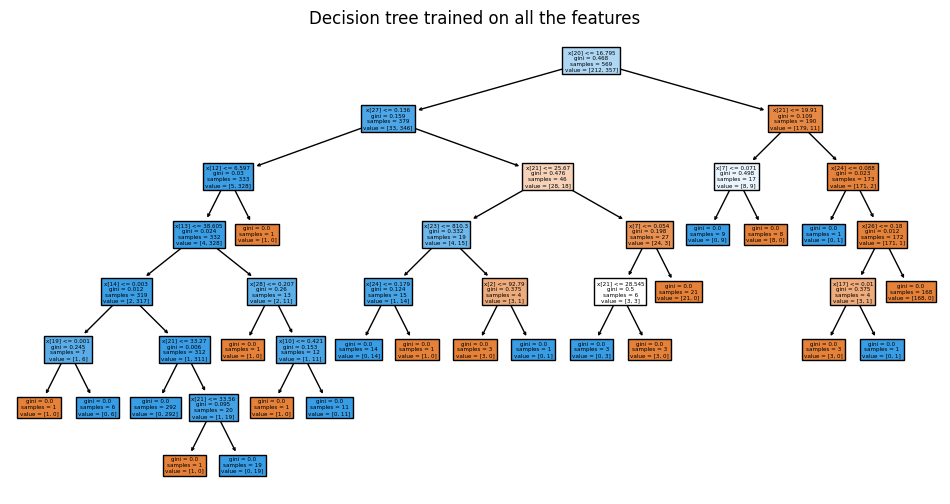

In [47]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
clf = DecisionTreeClassifier().fit(X, y)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the features")
plt.show()